# Data Analysis on Stackoverflow Developer Survey- 2017

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.options.display.max_rows = 4000
%matplotlib inline
plt.rcParams.update({'font.size':14})

## Contents

* [Business Understanding](#business)
* [Data Understanding](#understanding)
* [Data Preparation](#preparation)
* [Evaluating Results](#results)

<a id="business"></a>
## Business Understanding



The purpose of this project is to understand how to become a developer. The project uses survey results of the Stackoverflow data. This survey was conducted in 2017 posed interesting questions to various developers. This was done to find great insights to answer how to break into the field and other aspects involved. 

In [4]:
# import results data file
survey_df = pd.read_csv('survey_results_public.csv')
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# import schema data file
survey_schema = pd.read_csv('survey_results_schema.csv')
survey_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


<a id="understanding"></a>
## Data Understanding

In [8]:
survey_df.shape

(51392, 154)

In [10]:
# Number of non null values in expected salary and salary
print(sum(~survey_df['ExpectedSalary'].isnull()))
print(sum(~survey_df['Salary'].isnull()))

2566
12891


In [12]:
# Let's take a look at how the column with have worked language and want work langaue exist and what question they ask.
survey_schema[survey_schema['Column'].str.contains('have|want', flags=re.IGNORECASE)].values

array([['HaveWorkedLanguage',
        'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'],
       ['WantWorkLanguage',
        'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'],
       ['HaveWorkedFramework',
        'Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?'],
       ['WantWorkFramework',
        'Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?'],
       ['HaveWorkedDatabase',
        'Which of the following database technologies have you done extensive development work in over the past year, and which do you want to work in over th

In [14]:
# percentage of people who think they are either somewhat or greatly underpaid
100 * sum(survey_df['Overpaid'].dropna().apply(lambda x: 1 if 'Somewhat underpaid' in x or 'Greatly underpaid' in x else 0))/ survey_df['Overpaid'].dropna().shape[0]

56.5623365952043

In [16]:
# percentage of people who think they are neither underpaid not underpaid
100 * sum(survey_df['Overpaid'].dropna().apply(lambda x: 1 if 'Neither' in x else 0))/ survey_df['Overpaid'].dropna().shape[0]

36.13206842459102

In [18]:
# percentage of people who think they are either somewhat or greatly underpaid
100 * sum(survey_df['Overpaid'].dropna().apply(lambda x: 1 if 'Somewhat overpaid' in x or 'Greatly overpaid' in x else 0))/ survey_df['Overpaid'].dropna().shape[0]

7.305594980204676

In [20]:
# Categories and their frequencies in the HomeRemote column
survey_df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

### Of all the developers who worked remote before, 69.67% of the people feel communication is difficult during remote work 

In [22]:
# Percentage of people who worked remote think collaborating is difficult
100 * sum(survey_df[survey_df['HomeRemote'] != 'Never']['CollaborateRemote'].dropna().apply(lambda x: 1 if 'agree' in x.lower() and 'disagree' not in x.lower() else 0))/ survey_df[survey_df['HomeRemote'] != 'Never']['CollaborateRemote'].dropna().shape[0]


69.67702791001587

In [24]:
# All the columns with edu in their column name
survey_df.filter(regex='Edu*')

,FormalEducation,ImportantHiringEducation,EducationImportant,EducationTypes,CousinEducation,HighestEducationParents
0,Secondary school,Not at all important,NaN,Online course; Open source contributions,NaN,High school
1,Some college/university study without earning ...,Somewhat important,NaN,Online course; Self-taught; Hackathon; Open so...,NaN,A master's degree
2,Bachelor's degree,NaN,Not very important,Self-taught; Coding competition; Hackathon; Op...,NaN,A professional degree
3,Doctoral degree,Not very important,NaN,NaN,NaN,A doctoral degree
4,Master's degree,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
51387,Bachelor's degree,Not very important,Somewhat important,Online course; Self-taught; Coding competition,Take online courses; Part-time/evening courses...,A doctoral degree
51388,Master's degree,Somewhat important,NaN,Online course,Take online courses; Bootcamp; Part-time/eveni...,A master's degree
51389,Some college/university study without earning ...,NaN,Not very important,Self-taught; Coding competition,Contribute to open source,NaN
51390,Bachelor's degree,NaN,NaN,NaN,NaN,A bachelor's degree


<a id="preparation"></a>
## Data Preparation

In [26]:
# Education of parents vs salary of the respondents and does it give us any insights
new_df = survey_df[~survey_df['HighestEducationParents'].isna() & ~survey_df['Salary'].isna() ][['HighestEducationParents', 'Salary']]

In [28]:
def return_df(column_name):
    '''
        Doc String 
        Description: This function returns the dataframe with the top 5 keys and values of the column given as input
        Input: String - Column name of the dataframe
        Output: Dataframe - A dataframe with (5,) shape 
    '''
    temp_dict = {}
    def add_or_append(x):
        '''
            Doc String 
            Description: This function performs manipulations in a row of the column name input. It splits the row with the ';' 
                            and creates a count of each of the values obtained from the list after splitting. 
                            Populates the global variable for this function temp_dict
            Input: String - None
            Output: Dataframe - None 
        '''
        if x is not np.nan:
            for i in x:
                temp_dict[i.strip().lower()] = temp_dict.get(i.strip().lower(), 0) + 1
    z = survey_df[column_name].str.split(';').apply(lambda x: add_or_append(x))
    df = pd.DataFrame()
    df['tech'] = temp_dict.keys()
    df['Count'] = temp_dict.values()
    df = df.sort_values(by='Count', ascending = False)
    return df.iloc[:5,:]
return_df('HaveWorkedFramework')

,tech,Count
3,node.js,9522
2,angularjs,8962
0,.net core,6763
1,react,3953
4,cordova,2232


In [30]:
education_type_count = {}
def get_count(education_list):
    '''
        Doc String 
        Description: This function takes in a list of education types and populates the education_type_count variable 
                            with the count of each of these education types.   
        Input: String - list - of education types. 
        Output: Dataframe - None 
    '''
    if education_list is not np.NaN:
        if np.nan not in education_list:
            for education in education_list:
                education_type_count[education.strip()] = education_type_count.get(education.strip(), 0) + 1

In [32]:
# Education types and their frequencies. split each row with ';' and pass the list to the get_count function
survey_df['EducationTypes'].str.split(";").apply(lambda x: get_count(x))
education_type_count

{'Online course': 27584,
 'Open source contributions': 22450,
 'Self-taught': 54660,
 'Hackathon': 14300,
 'Coding competition': 13366,
 'Part-time/evening course': 9308,
 'On-the-job training': 25016,
 'Bootcamp': 5454,
 'Industry certification': 8944}

## Evaluating the Results

### What is the distribution of profession among the respondents?

Text(0, 0.5, 'Number of respondents')

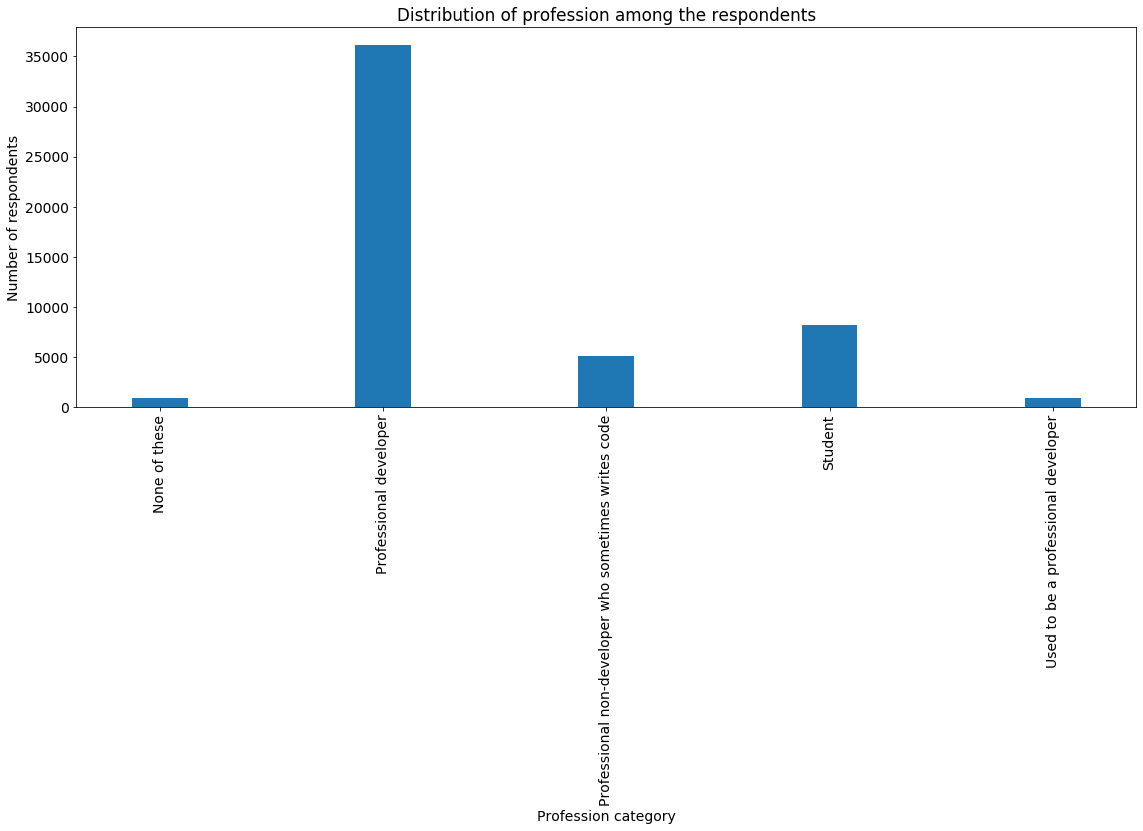

In [34]:
ax = survey_df.groupby(by='Professional').count()['Respondent'].plot(kind='bar', figsize=(19,7),
                                                                     width=0.25, title = "Distribution of profession among the respondents")
ax.set_xlabel("Profession category")
ax.set_ylabel("Number of respondents")

It can be seen that most of the respondents are professional developers. This means that the answers given will be useful to derive insights into how to break into the field. 

### How many developers love solving problems?

Text(0, 0.5, 'Number of respondents')

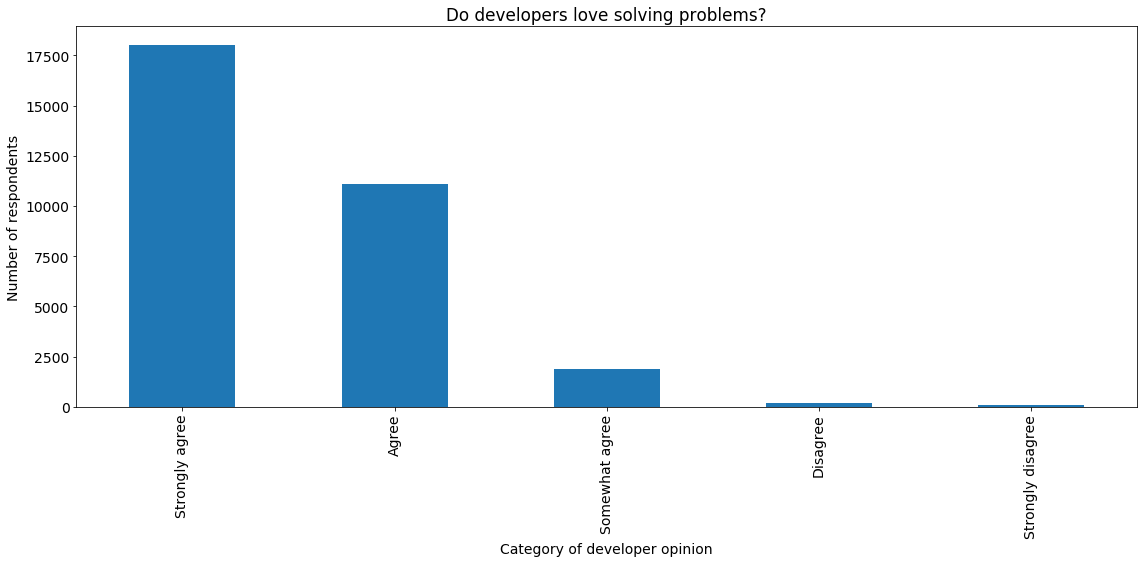

In [36]:
ax = survey_df['ProblemSolving'].value_counts().plot(kind='bar', figsize=(19,7), title='Do developers love solving problems?')
ax.set_xlabel('Category of developer opinion')
ax.set_ylabel('Number of respondents')

It can be seen that most of the developers agree that they love problem solving. This common love for solving problem might mean that it is an essential skill to have for those wanting to enter the field. 

### What is the distribution for level of satisfaction in career?

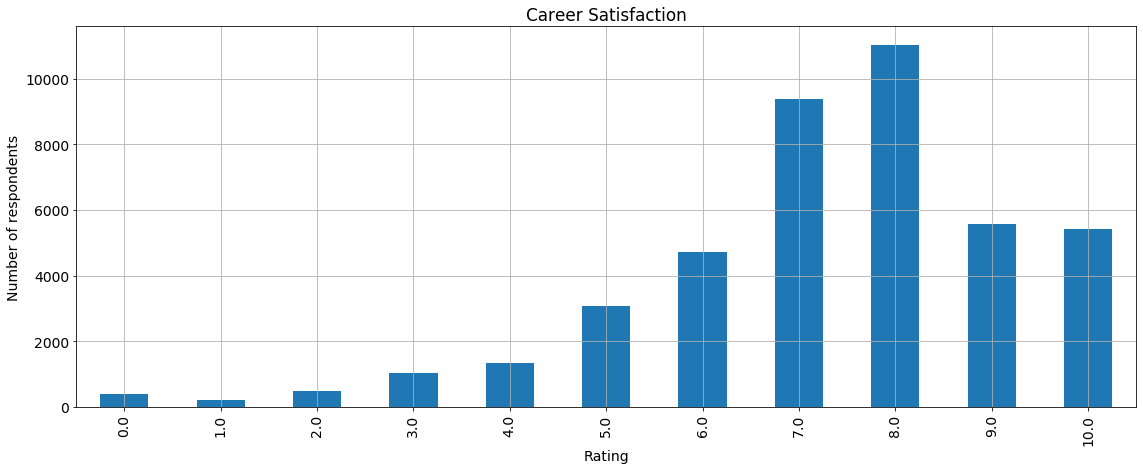

In [38]:
ax = survey_df['CareerSatisfaction'].value_counts().sort_index().plot(kind='bar', figsize=(19,7), title = 'Career Satisfaction')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of respondents')
ax.grid(True)

The career satisfaction on an average seems to be high among the respondents. This shows that the developers are fairly satisfied after pursuing careers as developers.  

### What is the distribution for level of satisfaction in job?

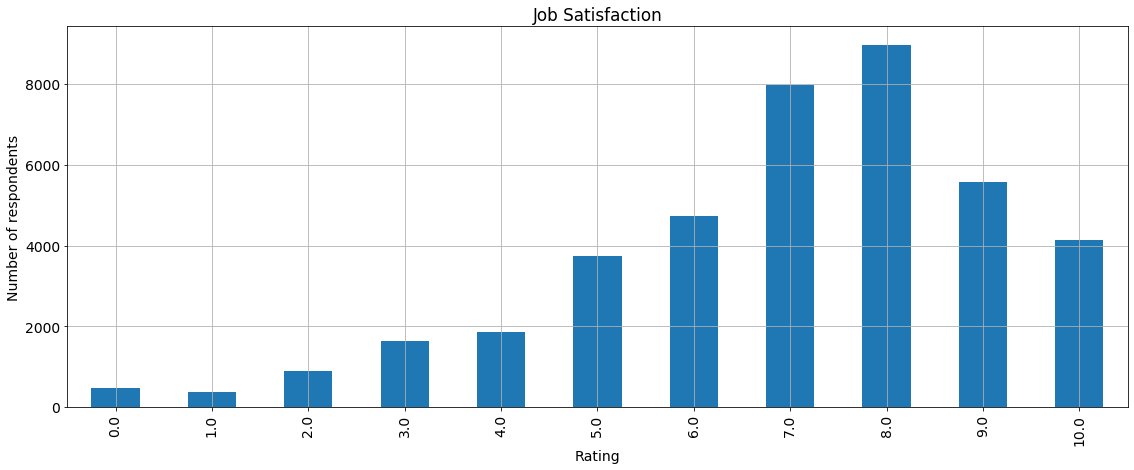

In [40]:
ax = survey_df['JobSatisfaction'].value_counts().sort_index().plot(kind='bar', figsize=(19,7), title = 'Job Satisfaction')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of respondents')
ax.grid(True)

Developers also seem to be fairly satisfied with their jobs as developers. 

### What is the distribution for level of satisfaction in career and jobs? Are people more satisfied with their career or job?


Text(0.5, 1.0, 'Job Satisfaction vs Career Satisfaction')

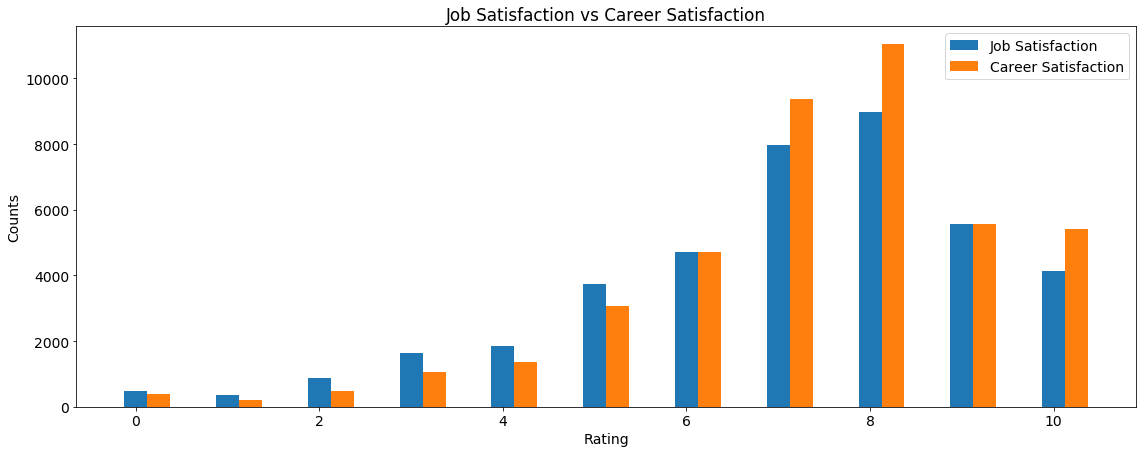

In [42]:
plt.figure(figsize=(19,7))

# sort with index
sorted_df_job = survey_df['JobSatisfaction'].value_counts().sort_index()
ax1 = plt.bar(sorted_df_job.index, sorted_df_job.values, width = 0.25, label = 'Job Satisfaction')

# sort with index
sorted_df_career = survey_df['CareerSatisfaction'].value_counts().sort_index()
ax2 = plt.bar(sorted_df_career.index+0.25, sorted_df_career.values, width = 0.25, label = 'Career Satisfaction')

plt.legend(handles=[ax1, ax2])
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Job Satisfaction vs Career Satisfaction')

It can be seen that developers are more satisfied with their careers as compared to their jobs. Career satisfaction probably played a more significant role in them choosing to become developers.

### Of all the developers who have an opinion about either overpaid or underpaid 


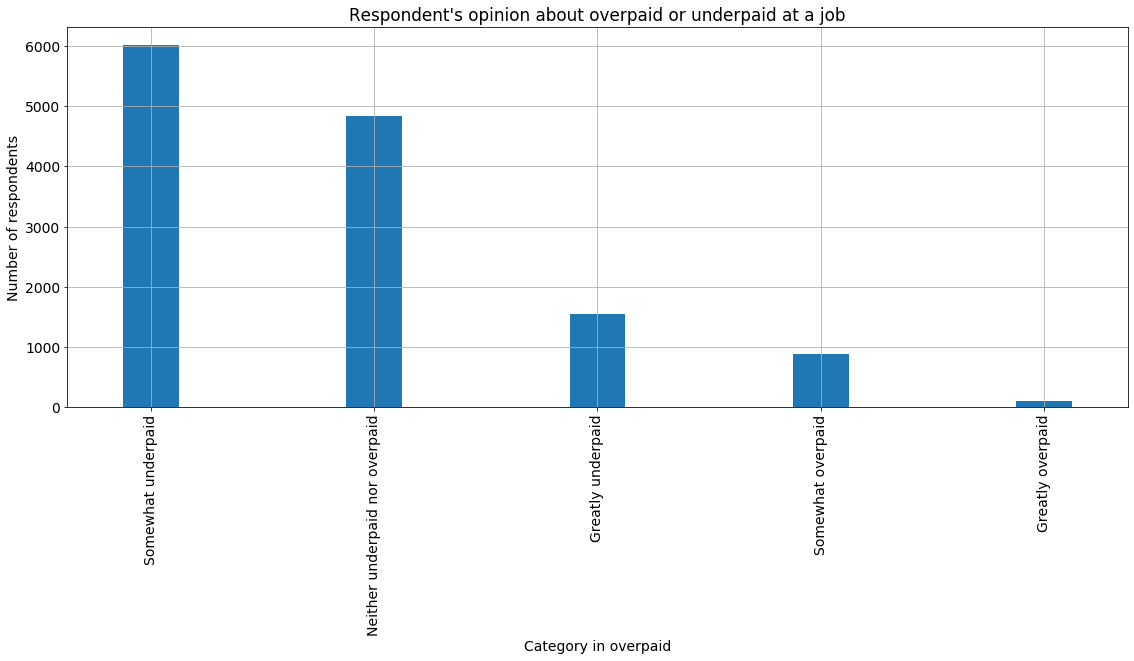

In [44]:
ax = survey_df['Overpaid'].value_counts().plot(kind='bar', figsize=(19,7), width=0.25, title = "Respondent's opinion about overpaid or underpaid at a job")
ax.set_xlabel('Category in overpaid')
ax.set_ylabel('Number of respondents')
ax.grid(True)

* 56.46% of them think they are underpaid 
* 7.3% of them think they are overpaid
* 36.13% of them they they are neither overpaid nor underpaid

### What languages, frameworks, databases and platforms developers used before vs what do they want to work on? 

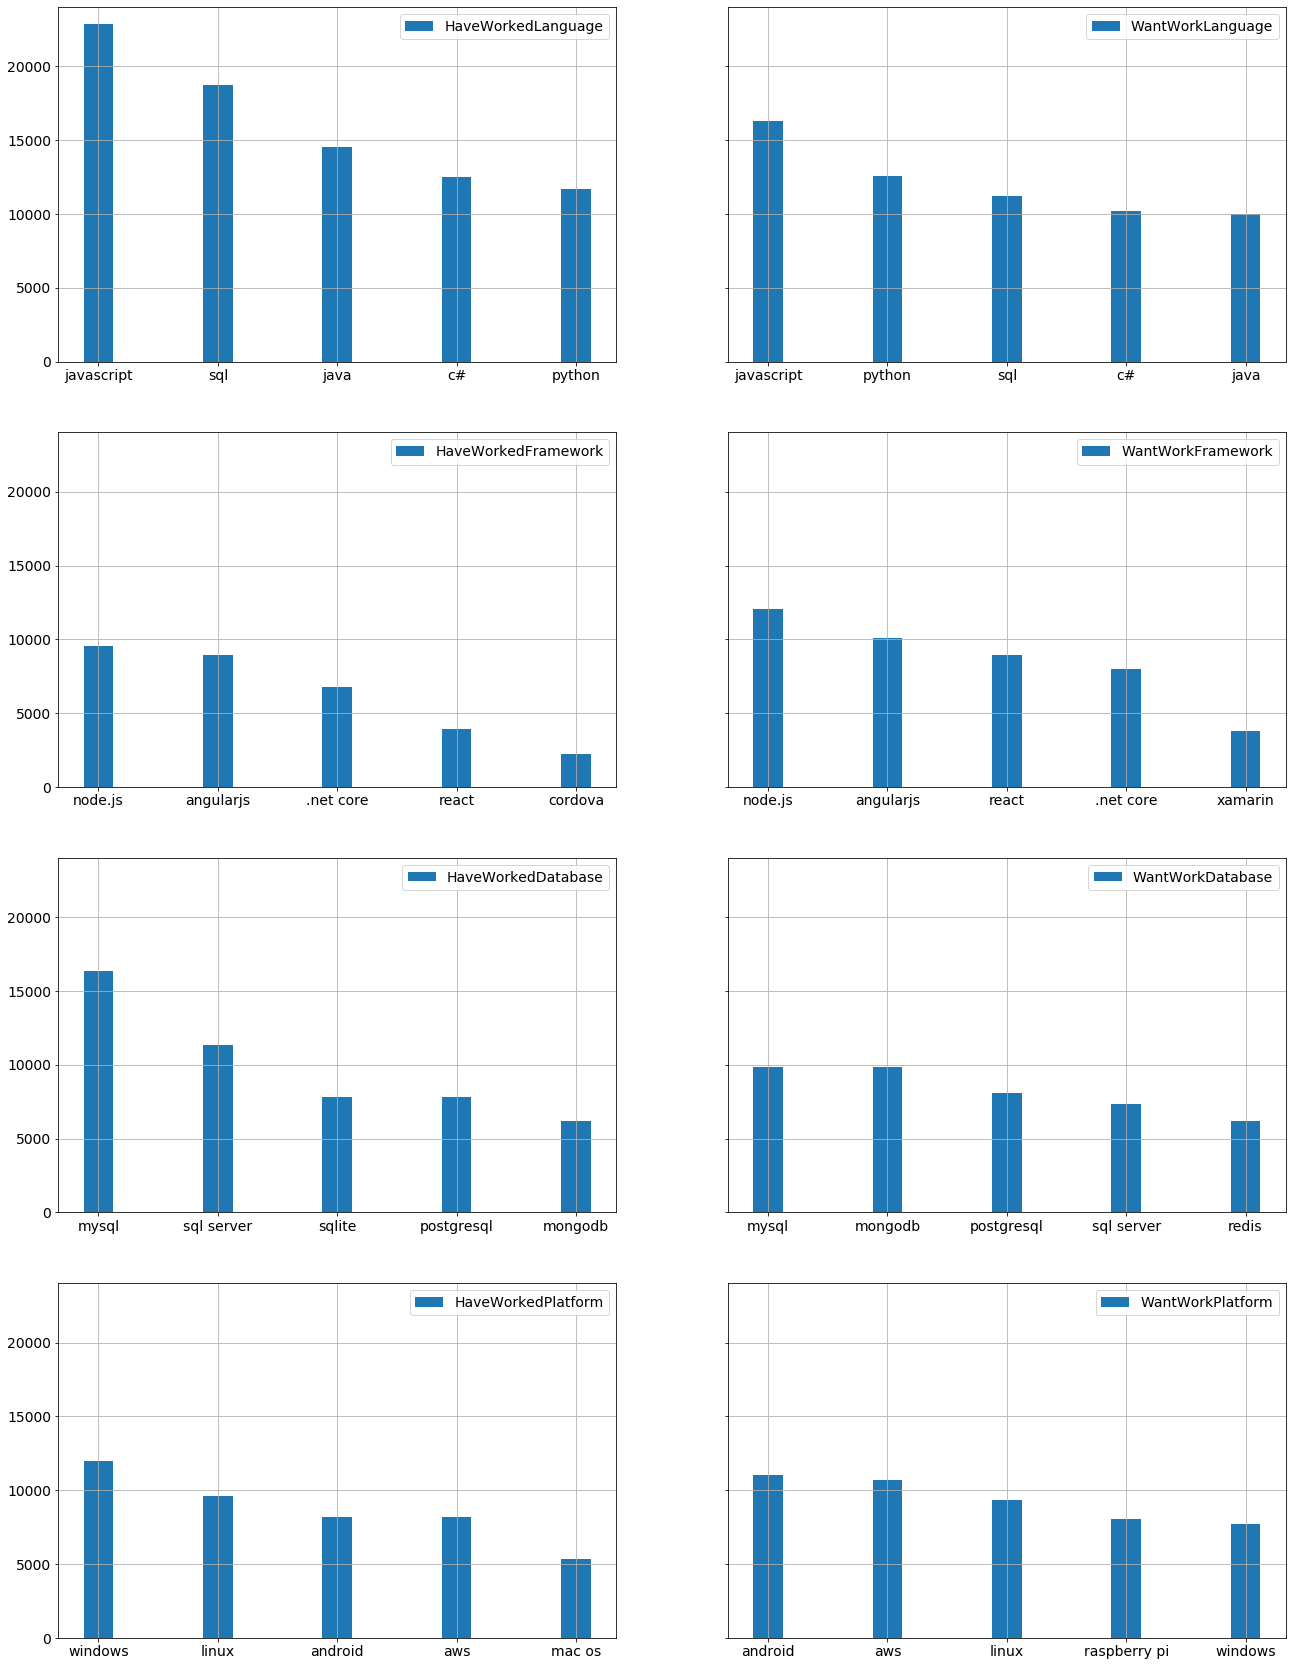

In [46]:
fig, ax= plt.subplots(4,2, figsize=(22,30), sharey=True)

ax[0,0].bar(return_df('HaveWorkedLanguage')['tech'],return_df('HaveWorkedLanguage')['Count'], width=0.25, label = 'HaveWorkedLanguage')
ax[0,0].legend()
ax[0,0].grid(True)

ax[0,1].bar(return_df('WantWorkLanguage')['tech'],return_df('WantWorkLanguage')['Count'], width=0.25, label = 'WantWorkLanguage')
ax[0,1].legend()
ax[0,1].grid(True)

ax[1,0].bar(return_df('HaveWorkedFramework')['tech'],return_df('HaveWorkedFramework')['Count'], width=0.25, label = 'HaveWorkedFramework')
ax[1,0].legend()
ax[1,0].grid(True)

ax[1,1].bar(return_df('WantWorkFramework')['tech'],return_df('WantWorkFramework')['Count'], width=0.25, label = 'WantWorkFramework')
ax[1,1].legend()
ax[1,1].grid(True)

ax[2,0].bar(return_df('HaveWorkedDatabase')['tech'],return_df('HaveWorkedDatabase')['Count'], width=0.25, label = 'HaveWorkedDatabase')
ax[2,0].legend()
ax[2,0].grid(True)

ax[2,1].bar(return_df('WantWorkDatabase')['tech'],return_df('WantWorkDatabase')['Count'], width=0.25 , label = 'WantWorkDatabase')
ax[2,1].legend()
ax[2,1].grid(True)

df = return_df('HaveWorkedPlatform')['tech'].apply(lambda x: x.split(' ')[0] if 'desktop' in x else x)
df = df.apply(lambda x: 'aws' if 'aws' in x else x)
ax[3,0].bar(df,return_df('HaveWorkedPlatform')['Count'], width=0.25 , label = 'HaveWorkedPlatform')
ax[3,0].legend()
ax[3,0].grid(True)

df = return_df('WantWorkPlatform')['tech'].apply(lambda x: x.split(' ')[0] if 'desktop' in x else x)
df = df.apply(lambda x: 'aws' if 'aws' in x else x)
ax[3,1].bar(df,return_df('WantWorkPlatform')['Count'], width=0.25 , label = 'WantWorkPlatform')
ax[3,1].legend()
ax[3,1].grid(True)

plt.show()

* It can be seen that more developers prefer Python and want to work on it whereas the popularity of JavaScript has come down. 
* Frameworks such as react, .net core have become popular as developers have shown willingness to work with them. 
* Developers who have previously worked on MySQL are not very eager to work on it. Also, mongodb has gained popularity among developers.
* Windows popularity decreased by 3000 points whereas platforms such as android and aws have become more popular.

### How did respondents become developers?

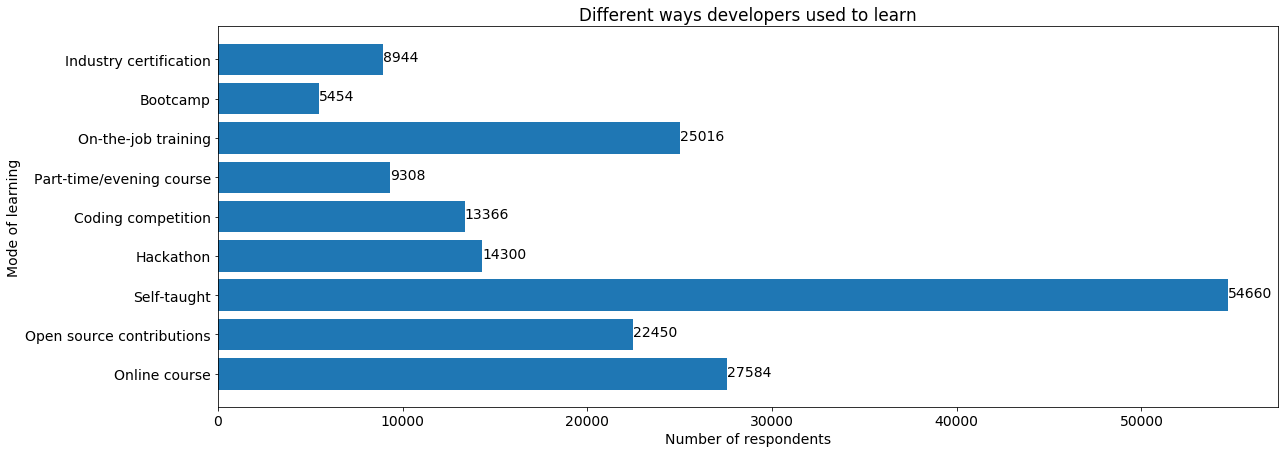

In [48]:
fig, ax = plt.subplots(figsize = (19,7))
ax.barh(list(education_type_count.keys()), education_type_count.values())
ax.set_title('Different ways developers used to learn')
ax.set_xlabel('Number of respondents')
ax.set_ylabel('Mode of learning')
for i,v in enumerate(education_type_count.values()):
    ax.text(v+4, i-0.05, str(v))

It can be seen that most of the developers are self taught. This means that formal education is not the only effective medium to gain the skills necessary. Many have also said that they used online courses to develop their skills.

### How does a parent's education influence the success of the respondent?

Text(0, 0.5, 'Level of education')

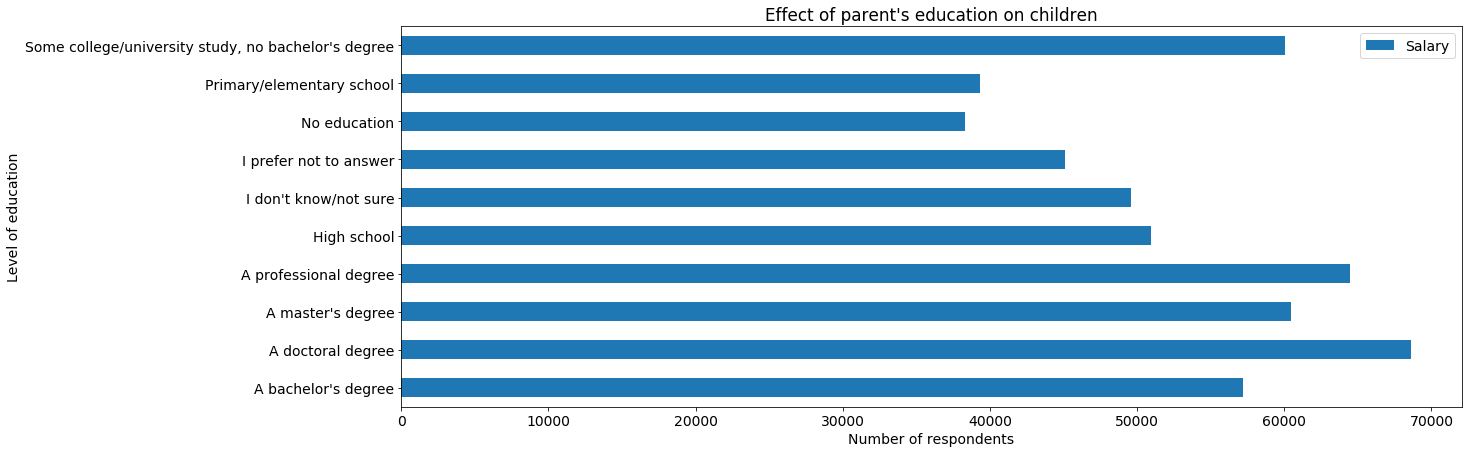

In [50]:
# average salary of respondents for each of the category in HighestEducationParents
ax = new_df.groupby(by='HighestEducationParents').mean().plot(kind='barh', figsize=(19,7))
ax.set_title("Effect of parent's education on children")
ax.set_xlabel('Number of respondents')
ax.set_ylabel('Level of education')

It can be seen that parent's education seems to have an effect on the success rates of the children. This is because children of highly educated parents were earning more salaries and are more succesful than those of parents who are not very educated. For instance, the children of those parents who do not have any education seem to be earning the least and are least succesful. 